# 自然语言处理

## 自然语言处理的常用包

英文自然语言处理方法：

NLTK (Natural Language Toolkit)

spaCy (Industrial - Strength Natural Language Processing)

中文自然语言处理方法：

pynlpir (NLPIR 汉字分词系统)

## 自然语言处理的包导入及设置

In [1]:
# -*- coding: uft-8 -*-
import pynlpir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [3]:
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname = r"c:\windows\fonts\simhei.ttf", size = 15) # 设置字体

## 数据读入

In [4]:
text = open("2017.txt", "r").read().replace("\n", "")
text[:150]

'主持人：中国中央电视台！主持人：中国中央电视台！主持人：此刻我们在北京中央电视台一号演播大厅向全球现场直播《2017年春节联欢晚会》。主持人：春回大地百花艳，节至人间万象新，一年一度的春节联欢晚会又一次如约而至。主持人：连续举办34年的央视春晚，已经成为伴随13亿中华儿女和全球华人辞旧迎新的新年俗。'

## 分词处理

打开分词器： .open()


In [5]:
pynlpir.open()

进行探索性分词并显示结果中的前20项

In [6]:
pynlpir.segment(text, pos_names = "parent", pos_english = False)[:20]
# pos_tagging: 是否带有词性标注（speech tagging）， 默认为True
# pos_names: 词性名称的返回方式， parent 为基本，child 为详细
# pos_english: 词性名称是否用英文标识

part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'


[('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('此刻', '代词'),
 ('我们', '代词'),
 ('在', '介词'),
 ('北京', '名词'),
 ('中央电视台', None),
 ('一', '数词'),
 ('号', '量词'),
 ('演播', '动词')]

通过探索性分词，发现如下三个问题，需要进一步优化分词方案：

（1）分词问题：某些词的切分补准确，如“央视”，需要自定义词汇

（2）停用词问题：需要排除掉个别词语，如“主持人”，需要处理停用词

（3）缺字段“年份”

## 自定义词汇

自定义词汇的方法： .nlpir.AddUserWord()

In [7]:
pynlpir.nlpir.AddUserWord("央视".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("主持人".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("观众朋友们".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("春联".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("一号演播大厅".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("综合频道".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("综艺频道".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("中文国际频道".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("军事农业频道".encode("utf8"), "noun")
pynlpir.nlpir.AddUserWord("少儿频道".encode("utf8"), "noun")

1

对数据进行重新分词

In [8]:
pynlpir.segment(text, pos_names = "parent", pos_english = False)[:20]

part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'


[('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('此刻', '代词'),
 ('我们', '代词'),
 ('在', '介词'),
 ('北京', '名词'),
 ('中央电视台', None),
 ('一号演播大厅', '名词'),
 ('向', '介词'),
 ('全球', '名词')]

对2017年春晚主持词数据进行分词，并追加至一个新的列表 words 中

In [9]:
words = []  # 学会这种先定义一个空结构在补充内容（取值）的思路
year = 2017
year_words = []
year_words.extend(pynlpir.segment(text, pos_names = "parent", pos_english = False)) # 此处 year_words 是元组，无法修改，需要转换成列表
for j in range(len(year_words)):
    ls_year_words = list(year_words[j])
    ls_year_words.append(year)
    words.append(ls_year_words)
words[2:13]

part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'


[['中国', '名词', 2017],
 ['中央电视台', None, 2017],
 ['！', '标点符号', 2017],
 ['主持人', '名词', 2017],
 ['：', '标点符号', 2017],
 ['中国', '名词', 2017],
 ['中央电视台', None, 2017],
 ['！', '标点符号', 2017],
 ['主持人', '名词', 2017],
 ['：', '标点符号', 2017],
 ['此刻', '代词', 2017]]

In [10]:
year_words

[('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('此刻', '代词'),
 ('我们', '代词'),
 ('在', '介词'),
 ('北京', '名词'),
 ('中央电视台', None),
 ('一号演播大厅', '名词'),
 ('向', '介词'),
 ('全球', '名词'),
 ('现场', '处所词'),
 ('直播', '动词'),
 ('《', '标点符号'),
 ('2017年', '时间词'),
 ('春节', '时间词'),
 ('联欢', '动词'),
 ('晚会', '名词'),
 ('》', '标点符号'),
 ('。', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('春', '时间词'),
 ('回', '动词'),
 ('大地', '名词'),
 ('百花', '名词'),
 ('艳', '形容词'),
 ('，', '标点符号'),
 ('节', '名词'),
 ('至', '介词'),
 ('人间', '名词'),
 ('万象', '名词'),
 ('新', '形容词'),
 ('，', '标点符号'),
 ('一年一度', '区别词'),
 ('的', '助词'),
 ('春节', '时间词'),
 ('联欢', '动词'),
 ('晚会', '名词'),
 ('又', '副词'),
 ('一', '数词'),
 ('次', '量词'),
 ('如约', '副词'),
 ('而', '连词'),
 ('至', '动词'),
 ('。', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('连续', '形容词'),
 ('举办', '动词'),
 ('34', '数词'),
 ('年', '量词'),
 ('的', '助词'),
 ('央视', '名词'),
 ('春', '时间词'),
 ('晚', '时间词

将列表 words 转换为数据框对象 df_words

In [11]:
df_words = pd.DataFrame(words, columns = ["词汇", "词性", "年份"])
df_words.head(25)

,词汇,词性,年份
0,主持人,名词,2017
1,：,标点符号,2017
2,中国,名词,2017
3,中央电视台,None,2017
4,！,标点符号,2017
5,主持人,名词,2017
6,：,标点符号,2017
7,中国,名词,2017
8,中央电视台,None,2017
9,！,标点符号,2017


查看行数

In [12]:
df_words.index.size # 另一个方法： df_words.shape[0]

6698

## 停用词处理

读入停用词表 stopwords.txt

In [13]:
stopwords = open("stopwords.txt").read()
stopwords[:20]

'主持人:\n主持人：\n主持词\n(\n（\n？\n'

过滤停用词

In [14]:
for i in range(df_words.shape[0]):
    if df_words.词汇[i] in stopwords:
        df_words.drop(i, inplace = True) # inplace = True 的含义为修改数据本身
    else:
        pass

In [15]:
df_words.head(15)

,词汇,词性,年份
2,中国,名词,2017
3,中央电视台,None,2017
7,中国,名词,2017
8,中央电视台,None,2017
12,此刻,代词,2017
13,我们,代词,2017
15,北京,名词,2017
16,中央电视台,None,2017
17,一号演播大厅,名词,2017
18,向,介词,2017


查看停用词处理后的词数

In [16]:
df_words.shape[0]

3976

## 词性分布分析

统计2017央视春晚主持词的词性分布

In [17]:
df_WordSpeechDistribution = pd.DataFrame(df_words["词性"].value_counts(ascending = False)) # value_counts() 计算并按降序排序
df_WordSpeechDistribution.head(10)

,词性
名词,1248
动词,963
代词,315
形容词,266
副词,213
量词,199
时间词,181
数词,180
介词,94
方位词,65


修改列名

In [18]:
df_WordSpeechDistribution.rename(columns = {"词性":"频数"}, inplace = True)
# inplace: 是否修改数据框本身
# columns = {"旧名称1":"新名称1", "旧名称2":"新名称2"}
df_WordSpeechDistribution.head()

,频数
名词,1248
动词,963
代词,315
形容词,266
副词,213


In [19]:
df_WordSpeechDistribution["频数"].sum()

3965

增设一个新列 -- “百分百”

In [20]:
df_WordSpeechDistribution["百分比"] = df_WordSpeechDistribution["频数"] / df_WordSpeechDistribution["频数"].sum()
df_WordSpeechDistribution.head(10)

,频数,百分比
名词,1248,0.314754
动词,963,0.242875
代词,315,0.079445
形容词,266,0.067087
副词,213,0.053720
量词,199,0.050189
时间词,181,0.045649
数词,180,0.045397
介词,94,0.023707
方位词,65,0.016393


绘制前10位词性类别分布图

Text(0.5, 1.0, '2017央视春晚主持人“主持词”词性分布分析')

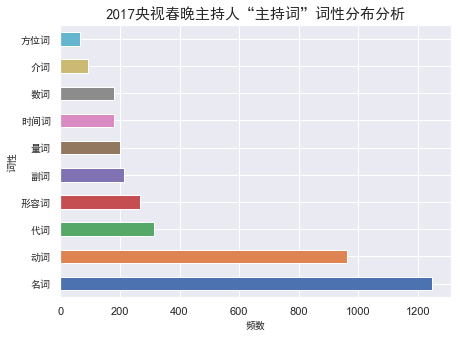

In [21]:
plt.subplots(figsize = (7, 5))
df_WordSpeechDistribution.iloc[:10]["频数"].plot(kind = "barh")
plt.yticks(fontproperties = font, size = 10)
plt.xlabel("频数", fontproperties = font, size = 10)
plt.ylabel("词性", fontproperties = font, size = 10)
plt.title("2017央视春晚主持人“主持词”词性分布分析", fontproperties = font)

## 高频词分析

定义6个主要词性列表

In [22]:
columns_slected = ["动词", "动词计数", "名词", "名词计数", "代词", "代词计数", "助词", "主次计数", "副词", "副词计数", "形容词", "形容词计数"]

定义6类次数统计数据框

In [23]:
df_Top6 = pd.DataFrame(columns = columns_slected)
for i in range(0, 12, 2):
    df_Top6[columns_slected[i]] = df_words.loc[df_words["词性"] == columns_slected[i]]["词汇"].value_counts().reset_index()["index"]
    df_Top6[columns_slected[i+1]] = df_words.loc[df_words["词性"] == columns_slected[i]]["词汇"].value_counts().reset_index()["词汇"]
df_Top6.head(16)

,动词,动词计数,名词,名词计数,代词,代词计数,助词,主次计数,副词,副词计数,形容词,形容词计数
0,要,23,中国,27,我们,100.0,着,16.0,不,22.0,好,23.0
1,到,22,福,27,我,34.0,过,12.0,最,13.0,新,19.0
2,请,20,朋友,22,这,32.0,之,11.0,更,12.0,大,15.0
3,来,18,观众,18,大家,23.0,得,10.0,就,11.0,幸运,11.0
4,看,14,观众朋友们,17,你,16.0,地,5.0,还,9.0,老,11.0
5,说,14,航天员,17,您,9.0,等,1.0,正,9.0,伟大,10.0
6,感谢,12,舟,14,此刻,8.0,连,1.0,将,8.0,欢乐,9.0
7,带,11,神,14,各族,7.0,NaN,NaN,再,8.0,美好,6.0
8,会,10,全国,14,这里,7.0,NaN,NaN,正在,7.0,深,5.0
9,花,9,字,14,每,7.0,NaN,NaN,又,7.0,高,4.0


## 词频统计

In [24]:
df_words.head()

,词汇,词性,年份
2,中国,名词,2017
3,中央电视台,None,2017
7,中国,名词,2017
8,中央电视台,None,2017
12,此刻,代词,2017


只保留 df_words 的 年份 和 词汇 两列，并转换个数成数据框对象 df_AnnaulWords

In [25]:
df_AnnaulWords = df_words[["年份", "词汇"]].pivot(columns = "年份", values = "词汇")
df_AnnaulWords.head()

年份,2017
2,中国
3,中央电视台
7,中国
8,中央电视台
12,此刻


需要把 NaN 值替换成 0

In [26]:
df_AnnaulWords.fillna(0, inplace = True)
df_AnnaulWords.head()

年份,2017
2,中国
3,中央电视台
7,中国
8,中央电视台
12,此刻


In [27]:
df_AnnualTopWords = pd.DataFrame(columns = [2017])
df_AnnualTopWords[2017] = df_AnnaulWords[2017].value_counts().reset_index()["index"]
# 最后加一个["index"]的目的是，只保留 index 部分，因为还有一个频次列

df_AnnualTopWords[1:].head(20)

,2017
1,我
2,春
3,这
4,们
5,年
6,福
7,中国
8,大家
9,到
10,来


## 关键词分析

定义一个数据框对象 df_annual_keywords,用于保存关键词提取结果

In [28]:
df_annual_keywords = pd.DataFrame(columns = [2017])

提取关键词，并保存到数据框中

In [29]:
df_annual_keywords[2017] = pynlpir.get_key_words(" ".join(df_AnnualTopWords[2017].astype("str")))

查看年度前10位关键词

In [30]:
df_annual_keywords.head(10)

,2017
0,姜昆
1,@春晚
2,杨利伟
3,中国
4,世界
5,人心
6,观众朋友们
7,央视
8,央视网
9,传祺


## 生成词云

下载导入包 wordcloud ， 在命令行中输入 python -m easy_install wordcloud 命令，注意不要用 pip install 命令

wordcloud 的安装需要下载 Microsoft Visual C++ 14.0， 下载URL为： http://landinghub.visualstudio.com/visualcpp-bulid-tools, 选择
    
Standalone Compiler 即可

In [33]:
from wordcloud import WordCloud,ImageColorGenerator
from imageio import imread

设置词云字体 

In [34]:
font_wc = r"C:\Windows\Fonts\msyhbd.ttc"

生成要显示的文字， wc.generate(text) 中需要的字符串，不需要带频次

In [35]:
myText = "".join(df_words.词汇)
myText[:20]

'中国中央电视台中国中央电视台此刻我们北京'

读入背景图片

In [49]:
bg_pic = imread('photo.png') # 图片这里有问题

设置词云属性，包括字体、背景图片、背景颜色、最大词数、字体最大值、图片默认大小等

In [50]:
wc = WordCloud(font_path = font_wc, mask = bg_pic, max_words = 500, max_font_size = 200, background_color = "white", 
               colormap = "Reds_r", scale = 15.5)

生成词云：.generate()  plt.imshow()

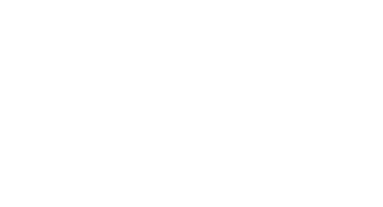

In [51]:
wc.generate(myText)
plt.imshow(wc)
plt.axis('off')
plt.show()

导出图片： .to_file()

In [44]:
wc.to_file("chun.jpg")

释放内存 .close()


In [52]:
pynlpir.close()